In [210]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [211]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        table
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [2267]:
table = np.genfromtxt('DMs_EDD.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_edd = table['pgc']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
inc   = table['inc']
Vmod   = table['Vmod']

DM_edd  = table['DMr']
dDM_edd = table['dDMr']


# DM_edd  = table['DMi']
# dDM_edd = table['dDMi']


# DM_edd  = table['DMz']
# dDM_edd = table['dDMz']

dDM_edd = table['dDMz']
DM_edd  = (table['DMr']+table['DMi']+table['DMz'])/3.


# DM_edd  = table['DM_w1']
# dDM_edd = table['dDM_w1']




ggg = table['ggg']
rrr = table['rrr']
iii = table['iii']
zzz = table['zzz']
w11 = table['w1']
w22 = table['w2']


Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

I = iii-DM_edd
W1 = w11-DM_edd
print len(pgc_edd)

10736


In [2268]:
drop = np.genfromtxt('TF_drop.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop = drop['PGC']


In [2269]:
logD = (DM_edd-25)/5.
logH = np.log10(Vmod) - logD  

keep = pgc_edd*0.

p = 0
for i, idd in enumerate(pgc_edd):
    
    if not idd in pgc_drop:
        
        keep[i] = 1
    else:
        p+=1

        
print p

473


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [2270]:

indx, = np.where((logH<2.5) & (logH>1.5) & (Vmod>4000) & (iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
                 & (Sqlt>3) & (keep==1))

# indx, = np.where((logH<2.5) & (logH>1.5) & (Vmod>4000) & (w11>0) & (Wqlt>3) & 
#                  (keep==1) & (W1<-16.1))

X0 = logWimx[indx]
X  = logWimx_e[indx]
Ye = 0.2*dDM_edd[indx]
V  = Vmod[indx]
Y  = logH[indx]
ax.set_xlim(0,1700)

P = X0/X

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


C=  [-0.01963816  0.10214618 -0.12809133]
Median =  1.877790437445979
0.007 76.26455256498932
0.015 75.56070382036111
0.024 74.63086661066502
0.034 73.6783694946101
0.043 78.22201480506017
0.054 80.12042625016954
0.062 77.33801593310804
0.074 71.01376111617716
1.3980134645573716
[-4.04881008  0.14551135  1.8768437 ]


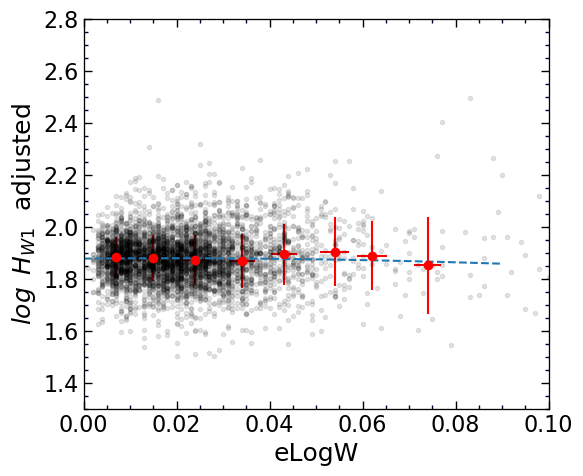

In [2271]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.set_xlim(0,0.1)
ax.set_ylim(1.3,2.8)
v = np.linspace(0,0.09,50)

xx = X
yy = Y




print 'C= ', c
print 'Median = ', np.median(yy)


c = np.polyfit(X,Y, 2, w=1./Ye**2)

ax.plot(X, Y, 'k.', alpha=0.1)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], '--')


XL = []
YL = []
YLe = []
for i in np.arange(0,0.08,0.01):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.01:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('eLogW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{W1}$'+'  adjusted', fontsize=18) 



set_axes(ax)




print 10**c[1]
print c

2.15 80.20463822284823
2.327 74.79563871581199
2.503 76.4127155541378
2.659 74.1986241392866
2.818 66.51639297628546
[-0.05052669  2.00500512]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f99877d4c10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99877e9b10>)

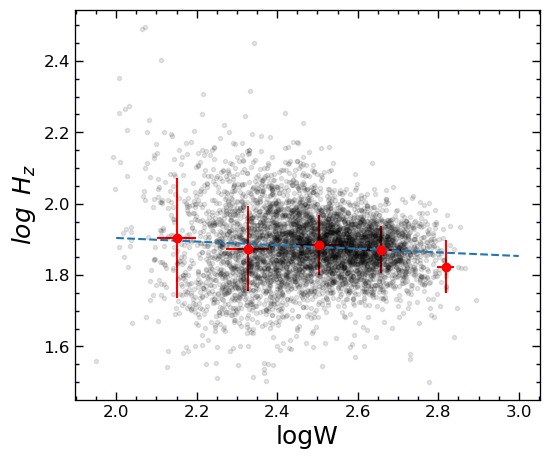

In [2272]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = X0 

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(2,3,0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('logW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(2,3,50)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X[(X>2.3)&(X<2.8)],Y[(X>2.3)&(X<2.8)], 1)#, w=1./Ye[(X>2.3)&(X<2.8)])
ax.plot(v,c[0]*v+c[1], '--')


print c

set_axes(ax, fontsize=12)

# Y = Y - (c[0]*X+c[1])+np.median(Y)

4596 73.5
5418 74.2
6618 75.3
7424 75.8
8481 75.6
9470 76.6
10537 75.4
11488 77.3
12425 76.5
13448 75.3
14410 77.7
15595 76.0
16567 85.8
17348 76.8
74.41328602698823 77.60250759688226
[1.65684291e-06 1.86502311e+00]
1.8716504830334288


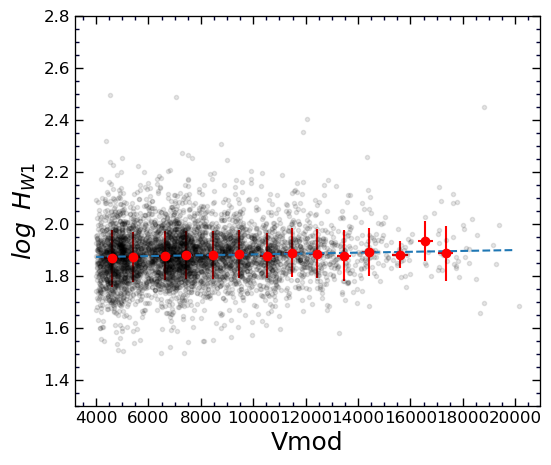

In [2273]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = V

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vmod', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{W1}$', fontsize=18) 

v = np.linspace(4000,20000,2000)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')


ax.set_ylim(1.3,2.8)

set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])
print c
print c[0]*4000.+c[1]

0.03999999999999915 1.0
0.22499999999999964 1.0
0.41000000000000014 1.0
0.6099999999999994 1.0
0.8000000000000007 1.0
0.9799999999999986 1.0
1.1500000000000004 1.0232929922807494


(<matplotlib.axes._subplots.AxesSubplot at 0x7f99876fdd90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9987703b50>)

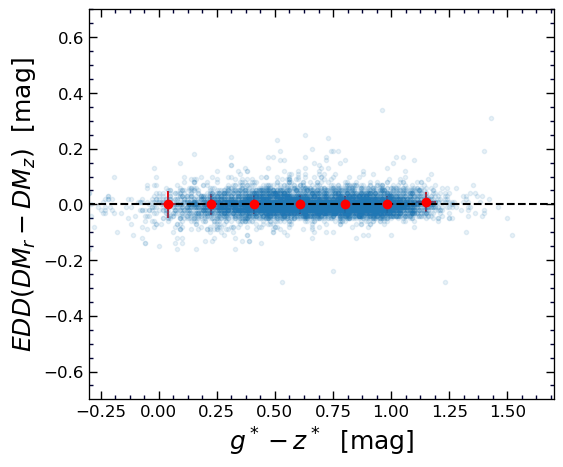

In [2251]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-zzz[indx] # logWimx[indx] #
Y = DMr[indx]-DMz[indx]

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.1,1.3, 0.20):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.3,1.7)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-z^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_z)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

0.03999999999999915 0.9549925860214291
0.22499999999999964 0.9772372209558151
0.41000000000000014 1.0
0.6099999999999994 1.0
0.8000000000000007 1.0
0.9799999999999986 1.0232929922807494
1.1500000000000004 1.0471285480509072


(<matplotlib.axes._subplots.AxesSubplot at 0x7f9987438c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f998747fed0>)

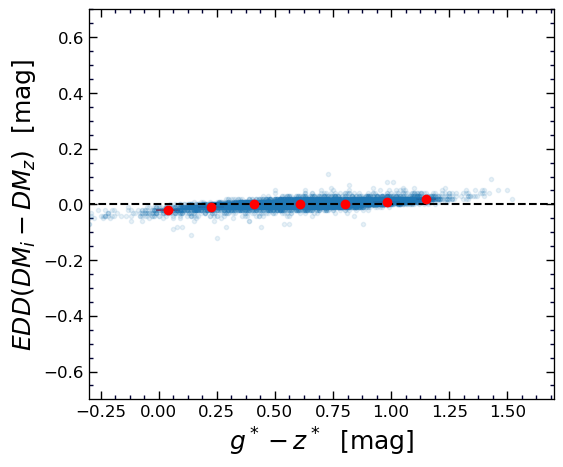

In [2252]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-zzz[indx] # logWimx[indx] #
Y = DMi[indx]-DMz[indx]

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.1,1.3, 0.20):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.3,1.7)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-z^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

0.06500000000000039 0.8912509381337441
0.23999999999999844 1.2022644346174083
0.41999999999999993 1.0
0.6100000000000012 0.9772372209558151
0.8000000000000007 0.9772372209558151
0.9799999999999986 1.0964781961431829
1.1500000000000004 1.1748975549395304


(<matplotlib.axes._subplots.AxesSubplot at 0x7f99871734d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99871b42d0>)

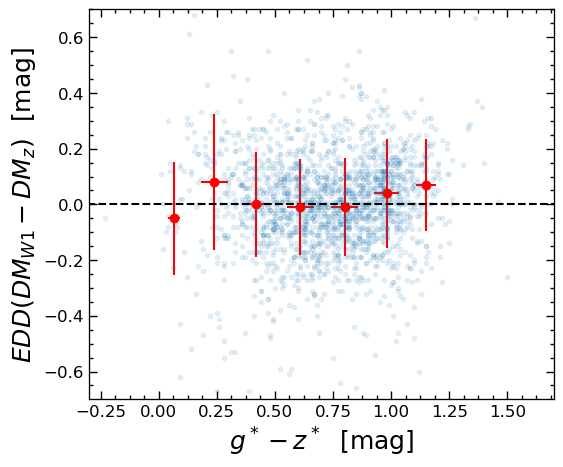

In [2253]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) &
                 (Wqlt>3) & (w11>0) )

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-zzz[indx] # logWimx[indx] #
Y = DM_w1[indx]-DMz[indx]

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.1,1.3, 0.20):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.3,1.7)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-z^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_z)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

In [2254]:
np.median(DMi[indx]-DMz[indx])

0.0

[ 2.28697805e-06 -1.43864592e-02]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f9987da4110>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9987a104d0>)

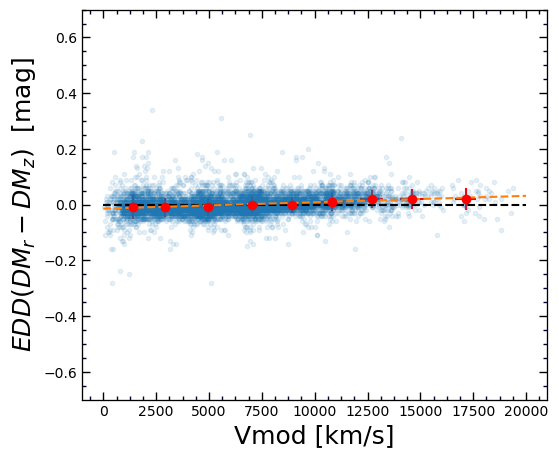

In [2255]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & 
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vmod[indx] #
Y = (DMr[indx])-DMz[indx]
Ye = np.sqrt(dDMr**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


v = np.linspace(0,20000,2000)
c = np.polyfit(X,Y, 1)
ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

[1.55922486e-07 2.16838339e-03]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f9989fe0350>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9988470610>)

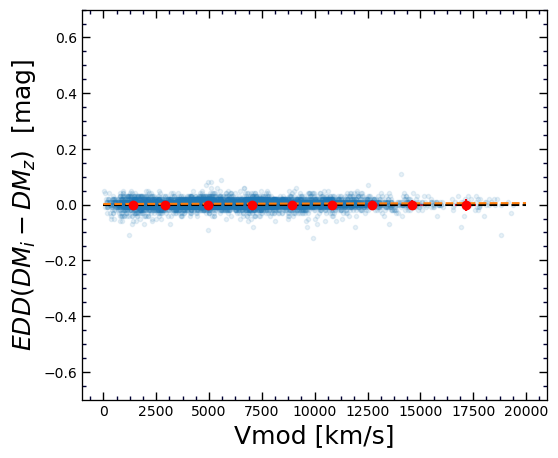

In [2256]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & 
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vmod[indx] #
Y = (DMi[indx])-DMz[indx]
Ye = np.sqrt(dDMi**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


v = np.linspace(0,20000,2000)
c = np.polyfit(X,Y, 1)
ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

0.00999999999999801


(<matplotlib.axes._subplots.AxesSubplot at 0x7f998ff027d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f999140f8d0>)

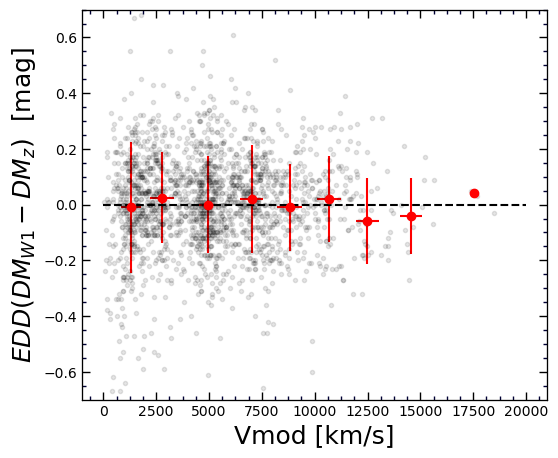

In [2257]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vmod[indx] #
Y = (DM_w1[indx])-DMz[indx]
Ye = np.sqrt(dDM_w1**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


# v = np.linspace(0,20000,2000)
# c = np.polyfit(X,Y, 1)
# ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)

# c = np.polyfit(X,Y, 0, w=1./Ye)
# ax.plot(v, v*0+c[0], '--')


ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

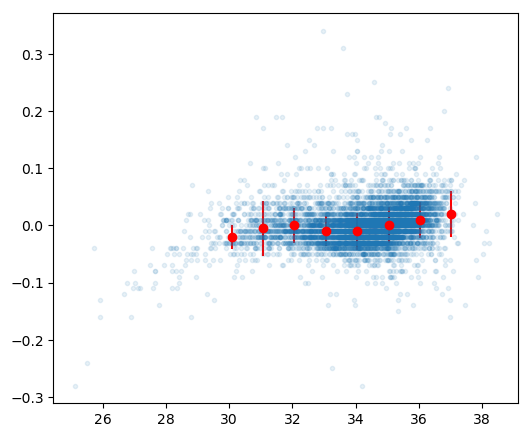

In [2266]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

indx, = np.where((Sqlt>3) & (keep==1) & (zzz>0))
                # & (Wqlt>3) & (w11>0)) 

# X =  logWimx[indx] #
X =  DMr[indx]
Y = (DMr[indx])-DMz[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(30,38,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.10:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
        
        


In [2259]:
indx, = np.where((zzz>0) & (Sqlt>3) & (Wqlt>3) & (Vmod<20000))
Y = DM_w1[indx]-DMz[indx]
Ye = np.sqrt(dDM_w1[indx]**2+dDMz[indx]**2)
print np.sum(Y/Ye)/np.sum(1./Ye)
np.median(Y), np.mean(Y), np.std(Y)

0.03316115186350705


(0.0, -0.008729769494850438, 0.2067597351610331)

0.00999999999999801
[ 5.19425203e-05 -1.06123185e-04]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f9992195cd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9995423410>)

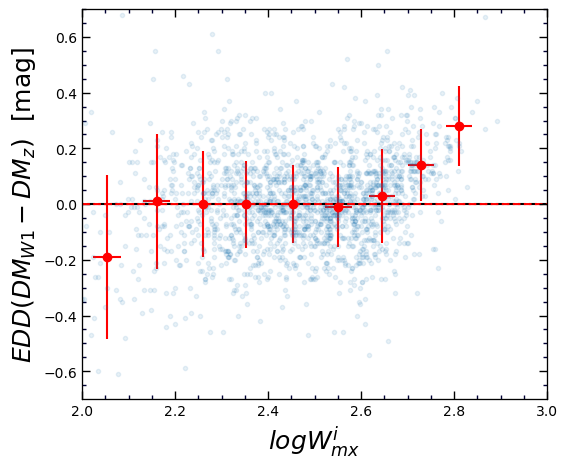

In [2260]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DM_w1[indx])-DMz[indx]
Ye = np.sqrt(dDM_w1**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.10:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X[(X>2.3)&(X<2.65)],Y[(X>2.3)&(X<2.65)], 1)
ax.plot(v,c[0]*v+c[1], 'r--')
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print c
set_axes(ax, fontsize=10)

In [2261]:
np.median(Y)

0.00999999999999801

[-0.00090353  0.00398872 -0.00430683]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f998cfe2c10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f998f244510>)

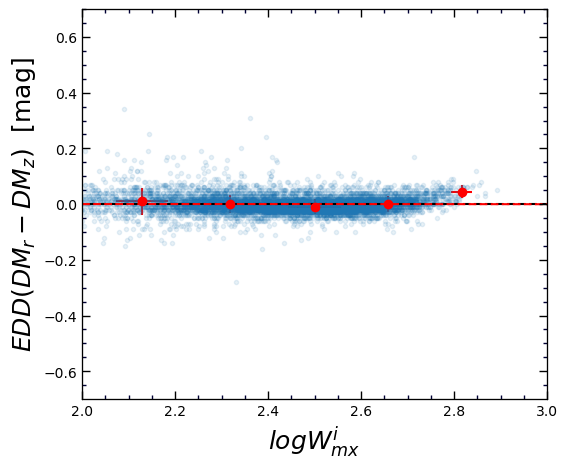

In [2262]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DMr[indx])-DMz[indx]
Ye = np.sqrt(dDMr**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X,Y, 2)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'r--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

[-0.01963816  0.10214618 -0.12809133]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f998b795890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f998bd93e10>)

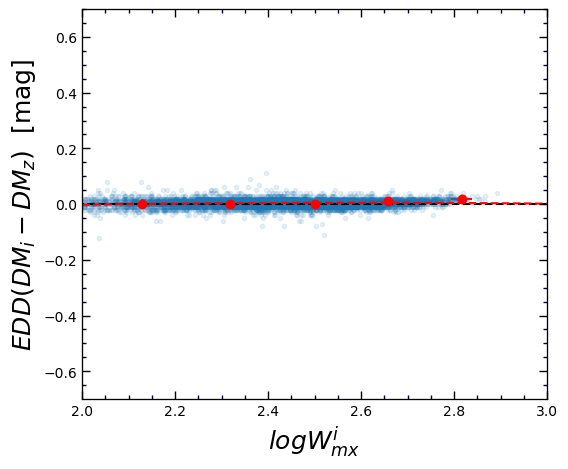

In [2263]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DMi[indx])-DMz[indx]
Ye = np.sqrt(dDMi**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X,Y, 2)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'r--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)